In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('drug_consumtion.data')

In [3]:
df.head()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
# df.gender = df.gender.apply(lambda x: 0 if x < 0 else 1)  # 1 - female, 0 - male

In [5]:
drugs_cols = [
    'alcohol',
    'amphet',
    'amyl',
    'benzos',
    'caff',
    'cannabis',
    'choc',
    'coke',
    'crack',
    'ecstasy',
    'heroin',
    'ketamine',
    'legalh',
    'lsd',
    'meth',
    'mushrooms',
    'nicotine',
    'semer',
    'vsa'
]

In [6]:
drug_mapping = {}
for drug in drugs_cols:
#     df[drug] = df[drug].apply(lambda x: 0 if x in ('CL0', 'CL1') else 1)
    df[drug], mapping = pd.factorize(df[drug])
    drug_mapping[drug] = mapping

In [7]:
# categories_mapping = {}
# for col in ['age', 'country', 'education', 'ethnicity']:
#     df[col], mapping = pd.factorize(df[col])
#     categories_mapping[col] = mapping

In [8]:
df.head()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,0,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,2,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,1,0,0,0,0,0,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,2,0,0,1,0,0,2,0,0,0


In [9]:
drug_mapping

{'alcohol': Index(['CL5', 'CL6', 'CL4', 'CL2', 'CL1', 'CL0', 'CL3'], dtype='object'),
 'amphet': Index(['CL2', 'CL0', 'CL1', 'CL3', 'CL5', 'CL4', 'CL6'], dtype='object'),
 'amyl': Index(['CL0', 'CL2', 'CL1', 'CL3', 'CL5', 'CL4', 'CL6'], dtype='object'),
 'benzos': Index(['CL2', 'CL0', 'CL3', 'CL1', 'CL4', 'CL5', 'CL6'], dtype='object'),
 'caff': Index(['CL6', 'CL5', 'CL4', 'CL3', 'CL0', 'CL1', 'CL2'], dtype='object'),
 'cannabis': Index(['CL0', 'CL4', 'CL3', 'CL2', 'CL1', 'CL6', 'CL5'], dtype='object'),
 'choc': Index(['CL5', 'CL6', 'CL4', 'CL0', 'CL3', 'CL2', 'CL1'], dtype='object'),
 'coke': Index(['CL0', 'CL3', 'CL2', 'CL1', 'CL6', 'CL5', 'CL4'], dtype='object'),
 'crack': Index(['CL0', 'CL1', 'CL2', 'CL3', 'CL5', 'CL4', 'CL6'], dtype='object'),
 'ecstasy': Index(['CL0', 'CL4', 'CL1', 'CL3', 'CL2', 'CL6', 'CL5'], dtype='object'),
 'heroin': Index(['CL0', 'CL1', 'CL2', 'CL3', 'CL5', 'CL6', 'CL4'], dtype='object'),
 'ketamine': Index(['CL0', 'CL2', 'CL3', 'CL1', 'CL5', 'CL4', 'CL6'], 

In [10]:
drug_count = df[drugs_cols].sum().sort_values(ascending=False)

In [11]:
drug_count

cannabis     5613
nicotine     5433
benzos       3290
amphet       3261
alcohol      2777
ecstasy      2632
legalh       2602
mushrooms    2238
coke         2153
lsd          2083
choc         1779
meth         1419
amyl         1127
vsa          1031
caff          967
ketamine      901
heroin        724
crack         561
semer          18
dtype: int64

In [12]:
df.to_csv('data.csv', index=False)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
y = df['cannabis']

In [15]:
for i in range(2):
    print("{}: {}".format(i, y[y==i].count()))

0: 413
1: 140


In [16]:
x = df[['age', 'gender', 'education', 'country', 'ethnicity', 'nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impulsive', 'ss']]

In [17]:
x = np.array(x)
y = np.array(y)
x

array([[ 0.49788,  0.48246, -0.05921, ..., -0.00665, -0.21712, -1.18084],
       [-0.07854, -0.48246,  1.98437, ..., -0.14277, -0.71126, -0.21575],
       [ 0.49788, -0.48246, -0.05921, ..., -1.0145 , -1.37983,  0.40148],
       ...,
       [-0.07854,  0.48246,  0.45468, ..., -1.38502,  0.52975, -0.52593],
       [-0.95197,  0.48246, -0.61113, ..., -2.57309,  1.29221,  1.2247 ],
       [-0.95197, -0.48246, -0.61113, ...,  0.41594,  0.88113,  1.2247 ]])

In [18]:
n_samples = x.shape[0]
n_train = int(n_samples * 0.7)
n_test = n_samples - n_train

In [19]:
perm = np.random.permutation(n_samples)
train_indx = perm[:n_train]
test_indx = perm[n_train:]

In [20]:
data_x_train, data_y_train = x[train_indx,:], y[train_indx]
data_x_test, data_y_test = x[test_indx,:], y[test_indx]
data_x_train = data_x_train.T
data_x_test = data_x_test.T

In [21]:
data_x_train.shape, data_x_test.shape

((12, 1319), (12, 566))

In [22]:
data_y_train.shape, data_y_test.shape

((1319,), (566,))

In [23]:
from mlp import MLP

In [27]:
nn = MLP(input_dim=12, first_hid_dim=18, second_hid_dim=10, output_dim=7, batch_size=32, learning_rate=1e-3)

In [28]:
def get_accuracy(predicted, true_value):
    return sum(true_value == predicted) / len(true_value)

In [29]:
number_of_iterations=500
stats = nn.train(data_x_train, data_y_train, data_x_test, data_y_test, number_of_iterations)

Epoch: 0, Loss: 10.816756558732173
Epoch: 1, Loss: 10.805768407103672
Epoch: 2, Loss: 10.794784762442141
Epoch: 3, Loss: 10.783805567539167
Epoch: 4, Loss: 10.772830766962953
Epoch: 5, Loss: 10.76186030709024
Epoch: 6, Loss: 10.750894136137589
Epoch: 7, Loss: 10.73993220419198
Epoch: 8, Loss: 10.728974463240833
Epoch: 9, Loss: 10.718020867201425
Epoch: 10, Loss: 10.707071371949716
Epoch: 11, Loss: 10.696125935348672
Epoch: 12, Loss: 10.685184517276024
Epoch: 13, Loss: 10.67424707965154
Epoch: 14, Loss: 10.663313586463834
Epoch: 15, Loss: 10.652384003796708
Epoch: 16, Loss: 10.641458299855044
Epoch: 17, Loss: 10.630536444990318
Epoch: 18, Loss: 10.619618411725686
Epoch: 19, Loss: 10.608704174780726
Epoch: 20, Loss: 10.5977937110958
Epoch: 21, Loss: 10.586886999856105
Epoch: 22, Loss: 10.575950118374196
Epoch: 23, Loss: 10.564891442740684
Epoch: 24, Loss: 10.553836337749697
Epoch: 25, Loss: 10.542784794680657
Epoch: 26, Loss: 10.531751070761095
Epoch: 27, Loss: 10.520729377683017
Epoch: 

Epoch: 253, Loss: 8.475695504512826
Epoch: 254, Loss: 8.47047105995329
Epoch: 255, Loss: 8.46528164119053
Epoch: 256, Loss: 8.46012702427435
Epoch: 257, Loss: 8.455006989959326
Epoch: 258, Loss: 8.449921323566787
Epoch: 259, Loss: 8.444869814835386
Epoch: 260, Loss: 8.439852257761704
Epoch: 261, Loss: 8.43486845043226
Epoch: 262, Loss: 8.429918194848348
Epoch: 263, Loss: 8.42500129674496
Epoch: 264, Loss: 8.420117565405103
Epoch: 265, Loss: 8.415266813470687
Epoch: 266, Loss: 8.410448856751142
Epoch: 267, Loss: 8.405663514030858
Epoch: 268, Loss: 8.400910606876458
Epoch: 269, Loss: 8.396189959444852
Epoch: 270, Loss: 8.39150139829303
Epoch: 271, Loss: 8.3868447521903
Epoch: 272, Loss: 8.382220700273724
Epoch: 273, Loss: 8.377734540053225
Epoch: 274, Loss: 8.373279052881312
Epoch: 275, Loss: 8.368854081911763
Epoch: 276, Loss: 8.364459471605887
Epoch: 277, Loss: 8.360095067574642
Epoch: 278, Loss: 8.355760716427213
Epoch: 279, Loss: 8.35145626562625
Epoch: 280, Loss: 8.347181563350095
E

Epoch: 485, Loss: 7.867881608732757
Epoch: 486, Loss: 7.8665973387775425
Epoch: 487, Loss: 7.86551170326519
Epoch: 488, Loss: 7.864239899508457
Epoch: 489, Loss: 7.862973990765802
Epoch: 490, Loss: 7.861699199144388
Epoch: 491, Loss: 7.860620546332134
Epoch: 492, Loss: 7.859359468894898
Epoch: 493, Loss: 7.858105727743878
Epoch: 494, Loss: 7.856859296412431
Epoch: 495, Loss: 7.855621404604401
Epoch: 496, Loss: 7.8545791172321024
Epoch: 497, Loss: 7.853354204138709
Epoch: 498, Loss: 7.8521364999086645
Epoch: 499, Loss: 7.8509259797632325


In [30]:
data_y_train_pred = nn.predict(data_x_train)
print("Train acc: {}".format(get_accuracy(data_y_train_pred, data_y_train)))

data_y_test_pred = nn.predict(data_x_test)
print("Test acc: {}".format(get_accuracy(data_y_test_pred, data_y_test)))

Train acc: 0.20318423047763456
Test acc: 0.1855123674911661


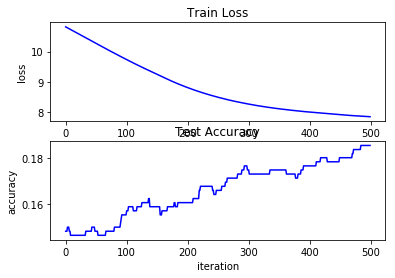

In [31]:
plt.subplot(211)
plt.title('Train Loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(number_of_iterations), stats['loss'], 'b', label="loss")

plt.subplot(212)
plt.title('Test Accuracy')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.plot(range(number_of_iterations), stats['test_accuracy'], 'b', label="accuracy")